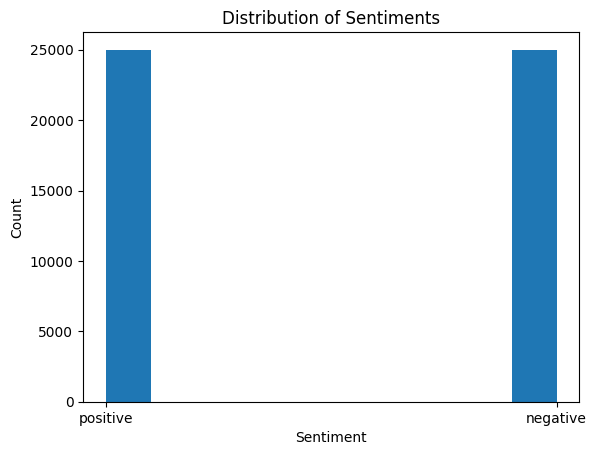

Accuracy: 0.8864
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[4331  630]
 [ 506 4533]]


In [17]:
# Step 1: Data Collection
import pandas as pd

# Load the IMDb movie reviews dataset
# Replace 'path_to_dataset' with the actual path to your dataset file
data = pd.read_csv(r"E:/Git Repo/Movie Review Sentiment Prediction/IMDB Dataset.csv")

# Step 2: Data Preprocessing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Function to preprocess text data
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Get English stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]  # Lemmatize tokens
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to the 'review' column
data['cleaned_review'] = data['review'].apply(preprocess_text)

# Step 3: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt

# Example EDA (you can customize this according to your dataset)
positive_reviews = data[data['sentiment'] == 'positive']
negative_reviews = data[data['sentiment'] == 'negative']

plt.hist(data['sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

# Step 4: Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_review'], data['sentiment'], test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 5: Model Selection
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression()

# Step 6: Model Training
model.fit(X_train_tfidf, y_train)

# Step 7: Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on test set
y_pred = model.predict(X_test_tfidf)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 8: Deployment - Not included in this code template

# Step 9: Iterate and Improve - Not included in this code template


In [18]:
# Assume you have a trained model named 'model' and a TF-IDF Vectorizer named 'tfidf_vectorizer'

# Sample movie review text
new_review = "This movie was absolutely fantastic! The acting was superb and the plot kept me engaged throughout."

# Preprocess the new review
cleaned_review = preprocess_text(new_review)

# Transform the cleaned review using the TF-IDF Vectorizer
new_review_tfidf = tfidf_vectorizer.transform([cleaned_review])

# Make predictions using the trained model
prediction = model.predict(new_review_tfidf)

# Map prediction label to sentiment
sentiment = "Positive" if prediction[0] == 'positive' else "Negative"

# Print the predicted sentiment
print("Predicted Sentiment:", sentiment)


Predicted Sentiment: Positive
